In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os as os
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#path="C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema3"
#os.chdir(path)

In [2]:
df = pd.read_excel(r"C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema3\\Schema3_Input1.xlsx")
df

,CASE_KEY,ACTIVITY_EN,EVENTTIME,SORTING,Payment Status,Company Code,Document Type,Entry Date,Time of Entry,Transaction Code,...,One-time account,ZTERM,Cash Discount Days 1,Cash Discount Days 2,Cash Discount Percentage 1,Cash Discount Percentage 2,Activities count,# Workflow Activities,# Change Activities,# Block Activities
0,110AT0115000200222019001,Vendor Creates Invoice,2019-05-08 00:00:00,10.0,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,0,0,0
1,110AT0115000200222019001,Acc. Doc. Baseline Date,2019-05-13 00:00:00,50.0,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,0,0,0
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,2019-05-15 03:06:54,NaN,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,1,0,0
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,2019-05-23 11:09:07,NaN,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,1,0,0
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,2019-06-04 13:20:30,NaN,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,110DE0154015036182019001,Purchase invoice document date,2019-08-20 00:00:01,80.0,On-Time,DE01,RM,20190820,130940,MIRO,...,NaN,YC30,30,0,0,0,1,0,0,0
499996,110DE0154015036182019001,Accounting document Invoice line created,2019-08-20 13:09:40,10.0,On-Time,DE01,RM,20190820,130940,MIRO,...,NaN,YC30,30,0,0,0,1,0,0,0
499997,110DE0154015036182019001,Purchase invoice line created,2019-08-20 13:09:43,171.0,On-Time,DE01,RM,20190820,130940,MIRO,...,NaN,YC30,30,0,0,0,1,0,0,0
499998,110DE0154015036182019001,Acc. Doc. Cleared,2019-09-19 23:59:59,50.0,On-Time,DE01,RM,20190820,130940,MIRO,...,NaN,YC30,30,0,0,0,1,0,0,0


In [82]:
df_other['Payment Status'].value_counts()

2    9038
1    7963
0    1020
Name: Payment Status, dtype: int64

In [71]:
df.columns

Index(['CASE_KEY', 'ACTIVITY_EN', 'EVENTTIME', 'SORTING', 'Payment Status',
       'Company Code', 'Document Type', 'Entry Date', 'Time of Entry',
       'Transaction Code', 'Local Currency', 'Parked by', 'Region',
       'One-time account', 'ZTERM', 'Cash Discount Days 1',
       'Cash Discount Days 2', 'Cash Discount Percentage 1',
       'Cash Discount Percentage 2', 'Activities count',
       '# Workflow Activities', '# Change Activities', '# Block Activities'],
      dtype='object')

In [3]:
#Activities Information
df_act=df.iloc[:,:2].copy()
df_act['Link'] = df_act['ACTIVITY_EN'].shift(-1)
df_act["dummy_count"]=1
df_act['cumsum'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(lambda x: x.cumsum())
df_act['summation'] = df_act.groupby(['CASE_KEY'])['dummy_count'].transform(sum)
df_act["new_counter"]=df_act['summation']-df_act['cumsum']
df_act['new_column_connect']=df_act['ACTIVITY_EN']+"-"+df_act['Link']
df_act['new_column_connect']=np.where(df_act['new_counter']==0,df_act['ACTIVITY_EN'],df_act['new_column_connect'])
df_act.drop(df_act[df_act.new_counter==0].index, inplace=True)
df_act.drop(['ACTIVITY_EN','Link','dummy_count','cumsum','summation','new_counter'],axis=1,inplace=True)
df_one_hot=pd.concat([pd.get_dummies(df_act['new_column_connect']), df_act['CASE_KEY']], axis=1)
df_one_hot.iloc[:,:-1].astype("int64")
y=['CASE_KEY']
columns=[i for i in df_one_hot if i not in y]
df_one_hot=df_one_hot.groupby('CASE_KEY')[columns].agg('sum')
df_one_hot=df_one_hot.append(df_one_hot.sum(axis=0).rename('Total'))
df_one_hot=df_one_hot.sort_values(by='Total', ascending=False, axis=1)
df_one_hot.drop(df_one_hot.iloc[:, 50:], inplace=True, axis=1)
df_one_hot.drop(df_one_hot.tail(1).index,inplace=True)
df_one_hot

,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice line created,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed-Purchase Invoice WF: Manual SES Creation completed,...,Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Purchase Invoice WF: Service Entry Sheet - Mass Release-R23 started,Acc. Doc. Baseline Date-Purchase invoice payment block set,Purchase invoice baseline date changed-Acc. Doc. WF: LIV Price Block Decision A13 completed,Purchase invoice baseline date changed-Purchase Invoice WF: 3W GRIR LIV Message to Accounts PayaA13 completed,Purchase invoice baseline date changed-Purchase Invoice WF: Generic decision task cancelled,Acc. Doc. Baseline Date-Purchase invoice payment block removed,Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Purchase Invoice WF: Sabrix LIV - Determine Tax Code cancelled,Purchase Invoice Line Quantity Difference Block removed-Purchase Invoice WF: Sabrix LIV - Determine Tax Code completed,Acc. Doc. Due Date Passed-Acc. Doc. WF: FI Only Non PO Focal Point Rejection completed,Purchase Invoice WF: Refresh Invoice Dialog completed-Purchase Invoice WF: Tax Error LIV - Determine Tax Code cancelled
CASE_KEY,,,,,,,,,,,,,,,,,,,,,
110AT0115000200222019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110AT0115000200942019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110AT0115000200952019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110AT0115000200982019001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110AT0115000200992019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110DE0154015036152019001,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110DE0154015036162019001,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110DE0154015036172019001,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Other COlumns
df_other=df.copy()
df_other.loc[df_other['Parked by'].str.len() == 6, 'Parked by'] = 'User'
df_other.loc[df_other['Parked by'].str.len() > 6, 'Parked by'] = 'Batch'
df_other=df_other.groupby(['Payment Status','CASE_KEY','Company Code', 'Document Type','Transaction Code', 'Local Currency','Parked by',
                 'Region','ZTERM','Cash Discount Days 1','Cash Discount Days 2', 'Cash Discount Percentage 1',
                 'Cash Discount Percentage 2'], as_index=False)['Activities count','# Workflow Activities',
                 '# Change Activities','# Block Activities'].sum()
values=df_other['Payment Status']
label_encoder=LabelEncoder()
df_other['Payment Status']=label_encoder.fit_transform(values)
values=df_other['Parked by']
label_encoder=LabelEncoder()
df_other['Parked by']=label_encoder.fit_transform(values)
values=df_other['Company Code']
label_encoder=LabelEncoder()
df_other['Company Code']=label_encoder.fit_transform(values)
values=df_other['Document Type']
label_encoder=LabelEncoder()
df_other['Document Type']=label_encoder.fit_transform(values)
values=df_other['Transaction Code']
label_encoder=LabelEncoder()
df_other['Transaction Code']=label_encoder.fit_transform(values)
values=df_other['Local Currency']
label_encoder=LabelEncoder()
df_other['Local Currency']=label_encoder.fit_transform(values)
values=df_other['Region']
label_encoder=LabelEncoder()
df_other['Region']=label_encoder.fit_transform(values)
values=df_other['ZTERM']
label_encoder=LabelEncoder()
df_other['ZTERM']=label_encoder.fit_transform(values)

df_final=pd.merge(df_one_hot,df_other,how='inner',on=['CASE_KEY'])
df_final

,CASE_KEY,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice line created,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,...,Region,ZTERM,Cash Discount Days 1,Cash Discount Days 2,Cash Discount Percentage 1,Cash Discount Percentage 2,Activities count,# Workflow Activities,# Change Activities,# Block Activities
0,110AT0154000735952019001,1,1,1,1,0,1,1,0,0,...,99,10,30,0,0,0,17,8,1,0
1,110AT0154000736312019001,1,0,1,0,1,0,0,1,0,...,99,10,20,0,0,0,18,9,1,0
2,110AT0154000736402019001,1,1,1,1,0,1,1,0,0,...,99,10,60,0,0,0,12,3,1,0
3,110AT0154000736602019001,1,1,1,1,0,0,0,1,0,...,75,13,30,0,0,0,12,3,1,0
4,110AT0154000736612019001,1,1,1,1,0,0,0,1,0,...,75,13,30,0,0,0,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,110DE0154015008842019001,1,1,1,1,0,1,1,0,0,...,50,10,60,0,0,0,14,5,1,0
18017,110DE0154015016212019001,1,0,1,0,1,1,1,0,0,...,38,13,60,0,0,0,14,5,1,0
18018,110DE0154015019582019001,0,1,1,1,0,1,1,0,1,...,56,10,60,0,0,0,11,2,1,0
18019,110DE0154015021022019001,1,1,1,1,0,0,0,1,0,...,58,10,30,0,0,0,12,3,1,0


In [68]:
df_final.to_excel('Final.xls')

In [34]:
df_final=pd.merge(df_one_hot,df_other,how='inner',on=['CASE_KEY'])
df_final

,CASE_KEY,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice line created,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,...,Region,ZTERM,Cash Discount Days 1,Cash Discount Days 2,Cash Discount Percentage 1,Cash Discount Percentage 2,Activities count,# Workflow Activities,# Change Activities,# Block Activities
0,110AT0154000735952019001,1,1,1,1,0,1,1,0,0,...,99,10,30,0,0,0,17,8,1,0
1,110AT0154000736312019001,1,0,1,0,1,0,0,1,0,...,99,10,20,0,0,0,18,9,1,0
2,110AT0154000736402019001,1,1,1,1,0,1,1,0,0,...,99,10,60,0,0,0,12,3,1,0
3,110AT0154000736602019001,1,1,1,1,0,0,0,1,0,...,75,13,30,0,0,0,12,3,1,0
4,110AT0154000736612019001,1,1,1,1,0,0,0,1,0,...,75,13,30,0,0,0,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,110DE0154015008842019001,1,1,1,1,0,1,1,0,0,...,50,10,60,0,0,0,14,5,1,0
18017,110DE0154015016212019001,1,0,1,0,1,1,1,0,0,...,38,13,60,0,0,0,14,5,1,0
18018,110DE0154015019582019001,0,1,1,1,0,1,1,0,1,...,56,10,60,0,0,0,11,2,1,0
18019,110DE0154015021022019001,1,1,1,1,0,0,0,1,0,...,58,10,30,0,0,0,12,3,1,0


In [73]:
df_final.columns

Index(['CASE_KEY', 'Acc. Doc. Cleared-Acc. Doc. Due Date Passed',
       'Vendor Creates Invoice-Purchase invoice document date',
       'Purchase invoice status set to Posted-Purchase invoice payment terms changed',
       'Purchase invoice document date-Acc. Doc. Baseline Date',
       'Vendor Creates Invoice-Acc. Doc. Baseline Date',
       'Accounting document Invoice line created-Purchase invoice status set to Posted',
       'Purchase invoice payment terms changed-Purchase invoice line created',
       'Accounting document Invoice line created-Purchase invoice line created',
       'Acc. Doc. Due Date Passed-Acc. Doc. Cleared',
       'Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed-Purchase Invoice WF: Manual SES Creation completed',
       'Purchase invoice line created-Acc. Doc. Cleared',
       'Acc. Doc. Baseline Date-Accounting document Invoice line created',
       'Acc. Doc. Baseline Date-Purchase invoice document date',
       'Accounting document I

In [74]:
df_final['Payment Status'].value_counts()

2    9038
1    7963
0    1020
Name: Payment Status, dtype: int64

In [33]:
df_one_hot.drop(df_one_hot.tail(1).index,inplace=True)
df_one_hot

,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice line created,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed-Purchase Invoice WF: Manual SES Creation completed,...,Purchase invoice document date-Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed,Purchase Invoice WF: Manual SES Creation completed-Purchase Invoice WF: Service Entry Sheet - Mass Release-R23 cancelled,Acc. Doc. For Payment Block Removed-Purchase Invoice Line Quantity Difference Block removed,Purchase invoice payment terms changed-Acc. Doc. Cleared,Accounting document Invoice line created-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Purchase Invoice WF: Refresh Invoice Dialog completed-Purchase Invoice WF: LIV Park - Enter note completed,Acc. Doc. Baseline Date-Purchase invoice line created,Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed,Acc. Doc. Baseline Date-Acc. Doc. Due Date Passed,Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed-Acc. Doc. WF: FI Only Non PO Coder decision task completed
CASE_KEY,,,,,,,,,,,,,,,,,,,,,
110AT0115000200222019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
110AT0115000200942019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
110AT0115000200952019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110AT0115000200982019001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
110AT0115000200992019001,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110DE0154015036142019001,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110DE0154015036152019001,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110DE0154015036162019001,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_order_pattern=df_final.iloc[:,1:50]
df_order_pattern=pd.concat([df_order_pattern,df_final.loc[:,'Payment Status']],axis=1)
df_order_pattern['order'] = (df_order_pattern.iloc[:,1].astype(str) + df_order_pattern.iloc[:,2].astype(str)+df_order_pattern.iloc[:,3].astype(str) + df_order_pattern.iloc[:,4].astype(str)+
                    df_order_pattern.iloc[:,5].astype(str) + df_order_pattern.iloc[:,6].astype(str)+df_order_pattern.iloc[:,7].astype(str) + df_order_pattern.iloc[:,8].astype(str)+
                    df_order_pattern.iloc[:,9].astype(str) + df_order_pattern.iloc[:,10].astype(str)+df_order_pattern.iloc[:,11].astype(str) + df_order_pattern.iloc[:,12].astype(str)+
                    df_order_pattern.iloc[:,13].astype(str) + df_order_pattern.iloc[:,14].astype(str))               
values=df_order_pattern['order']
label_encoder=LabelEncoder()
df_order_pattern['order_trans']=label_encoder.fit_transform(values)
df_order_pattern['order_trans']=df_order_pattern['order_trans'].astype("int64")
df_order_pattern

,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice line created,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed-Purchase Invoice WF: Manual SES Creation completed,...,Acc. Doc. For Payment Block Removed-Purchase Invoice Line Quantity Difference Block removed,Purchase invoice payment terms changed-Acc. Doc. Cleared,Accounting document Invoice line created-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Purchase Invoice WF: Refresh Invoice Dialog completed-Purchase Invoice WF: LIV Park - Enter note completed,Acc. Doc. Baseline Date-Purchase invoice line created,Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed,Acc. Doc. Baseline Date-Acc. Doc. Due Date Passed,Payment Status,order,order_trans
0,1,1,1,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,2,11101100110000,118
1,1,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,2,01010010100100,7
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,2,11101100110000,118
3,1,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,2,11100010100000,85
4,1,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,2,11100010100000,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,1,0,2,11101100100000,116
18017,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,2,01011100100100,21
18018,0,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,11101101100001,132
18019,1,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,2,11100010100000,85


In [111]:
df_order_pattern.to_excel('Order_Pattern.xlsx')

In [35]:
y=['CASE_KEY','Payment Status']
x=[i for i in df_final if i not in y]
y=['Payment Status']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_final[x], df_final[y], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.97


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 156    6  144]
 [   1 2304    1]
 [  37    0 2758]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.51      0.62       306
           1       1.00      1.00      1.00      2306
           2       0.95      0.99      0.97      2795

    accuracy                           0.97      5407
   macro avg       0.92      0.83      0.86      5407
weighted avg       0.96      0.97      0.96      5407



In [85]:
from sklearn.ensemble import RandomForestClassifier
logreg=RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=30)
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of logistic regression classifier on test set: 0.97


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 138    6  162]
 [   0 2304    2]
 [  16    2 2777]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.45      0.60       306
           1       1.00      1.00      1.00      2306
           2       0.94      0.99      0.97      2795

    accuracy                           0.97      5407
   macro avg       0.95      0.81      0.86      5407
weighted avg       0.96      0.97      0.96      5407



In [6]:
#df_other_Features=df_final.iloc[:,:50]
df_other_Features=df_final.iloc[:,1:1200]
df_other_Features=pd.concat([df_other_Features,df_final.loc[:,'Payment Status']],axis=1)
df_other_Features=df_other_Features.corr()
df_other_Features=df_other_Features.sort_values(by='Payment Status', ascending=False, axis=1)
df_other_Features.to_excel('Correlation_matrix1.xlsx')

'''
df_Imp_Links = pd.DataFrame(columns=['Links','Corr'])
df_Imp_Links['Links']=df_other_Features.columns
df_Imp_Links['Corr']=df_other_Features.iloc[49,:].copy()
df_Imp_Links
'''
df_other_Features

"\ndf_Imp_Links = pd.DataFrame(columns=['Links','Corr'])\ndf_Imp_Links['Links']=df_other_Features.columns\ndf_Imp_Links['Corr']=df_other_Features.iloc[49,:].copy()\ndf_Imp_Links\n"

In [7]:
df_other_Features

,Payment Status,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Purchase invoice line created-Acc. Doc. Cleared,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed-Acc. Doc. Cleared,Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed-Acc. Doc. Cleared,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice payment terms changed-Acc. Doc. Cleared,...,Acc. Doc. Due Date Passed-Acc. Doc. WF: Change po cancelled,Purchase Invoice WF: LIV Park - Enter note cancelled-Acc. Doc. Due Date Passed,Purchase Invoice WF: LIV Park - Enter note cancelled-Purchase invoice vendor changed,Purchase Subsequent Debit line created-Acc. Doc. WF: LIV Price Block Decision A13 completed,Purchase Subsequent Debit line created-Purchase Invoice WF: LIV Price Block Decision A13 cancelled,Purchase Invoice WF: SER LIV Inv - PO needs to be Released cancelled-Acc. Doc. Due Date Passed,Purchase invoice baseline date changed-Acc. Doc. WF: LIV Price Block Decision A13 completed,Acc. Doc. Baseline Date-Purchase invoice payment block removed,Acc. Doc. Due Date Passed-Acc. Doc. WF: FI Only Non PO Focal Point Rejection completed,Purchase Invoice WF: Refresh Invoice Dialog completed-Purchase Invoice WF: Tax Error LIV - Determine Tax Code cancelled
Acc. Doc. Cleared-Acc. Doc. Due Date Passed,0.666725,1.000000,0.539151,0.081166,0.185270,0.183078,0.054457,0.023314,0.059901,0.165824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor Creates Invoice-Purchase invoice document date,0.155845,0.059901,0.170542,0.618433,0.118447,0.114414,0.367982,0.365578,1.000000,-0.062061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase invoice status set to Posted-Purchase invoice payment terms changed,0.274421,0.081166,0.289053,1.000000,0.110202,0.107160,0.608012,0.604452,0.618433,0.093106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase invoice document date-Acc. Doc. Baseline Date,0.129760,0.064094,0.032565,0.422619,0.172999,0.173073,0.339941,0.124048,0.683504,-0.009377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor Creates Invoice-Acc. Doc. Baseline Date,-0.114354,-0.080941,-0.150318,-0.548848,-0.111452,-0.107552,-0.325540,-0.323407,-0.965210,0.070142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Purchase Invoice WF: SER LIV Inv - Exception Screen-IRN14 completed-Purchase Invoice WF: Sabrix LIV - Determine Tax Code cancelled,-0.017936,0.006643,-0.005075,0.003161,0.028680,-0.001893,-0.010681,-0.010613,0.005108,-0.001635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Invoice Line Quantity Difference Block removed-Purchase Invoice WF: Sabrix LIV - Determine Tax Code completed,0.006890,0.006643,0.010934,0.003161,-0.001935,-0.001893,0.005195,0.005229,0.005108,-0.001635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acc. Doc. Due Date Passed-Acc. Doc. WF: FI Only Non PO Focal Point Rejection completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Invoice WF: Refresh Invoice Dialog completed-Purchase Invoice WF: Tax Error LIV - Determine Tax Code cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_other_Features=df_final.iloc[:,:50]
df_other_Features=pd.concat([df_other_Features,df_final.loc[:,'Payment Status']],axis=1)
df_other_Features=df_other_Features.corr()
df_other_Features=df_other_Features.sort_values(by='Payment Status', ascending=False, axis=0)
df_other_Features
df_Imp_Links = pd.DataFrame(columns=['Links','Corr'])
df_Imp_Links['Corr']=0.0
df_Imp_Links['Links']=list(df_other_Features.index.values)
df_Imp_Links['Corr']=df_other_Features.loc[:,['Payment Status']]
df_Imp_Links

,Links,Corr
0,Payment Status,NaN
1,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,NaN
2,Purchase invoice line created-Acc. Doc. Cleared,NaN
3,Purchase invoice status set to Posted-Purchase...,NaN
4,Acc. Doc. WF: LIV DA - Approve / Reject R2.2 c...,NaN
5,Purchase Invoice WF: LIV DA - Approve / Reject...,NaN
6,Accounting document Invoice line created-Purch...,NaN
7,Purchase invoice payment terms changed-Purchas...,NaN
8,Vendor Creates Invoice-Purchase invoice docume...,NaN
9,Purchase invoice payment terms changed-Acc. Do...,NaN


In [69]:
df_other_Features.to_excel('Correlation_matrix.xlsx')

In [93]:
df_other_Features.shape

(18021, 16)

In [95]:
df_other_Features['order'] = (df_other_Features.iloc[:,1].astype(str) + df_other_Features.iloc[:,2].astype(str)+df_other_Features.iloc[:,3].astype(str) + df_other_Features.iloc[:,4].astype(str)+
                    df_other_Features.iloc[:,5].astype(str) + df_other_Features.iloc[:,6].astype(str)+df_other_Features.iloc[:,7].astype(str) + df_other_Features.iloc[:,8].astype(str)+
                    df_other_Features.iloc[:,9].astype(str) + df_other_Features.iloc[:,10].astype(str)+df_other_Features.iloc[:,11].astype(str) + df_other_Features.iloc[:,12].astype(str)+
                    df_other_Features.iloc[:,13].astype(str) + df_other_Features.iloc[:,14].astype(str))               
values=df_other_Features['order']
label_encoder=LabelEncoder()
df_other_Features['order_trans']=label_encoder.fit_transform(values)
df_other_Features['order_trans']=df_other_Features['order_trans'].astype("int64")
df_other_Features

,CASE_KEY,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Purchase invoice document date,Purchase invoice status set to Posted-Purchase invoice payment terms changed,Purchase invoice document date-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Baseline Date,Accounting document Invoice line created-Purchase invoice status set to Posted,Purchase invoice payment terms changed-Purchase invoice line created,Accounting document Invoice line created-Purchase invoice line created,Acc. Doc. Due Date Passed-Acc. Doc. Cleared,Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed-Purchase Invoice WF: Manual SES Creation completed,Purchase invoice line created-Acc. Doc. Cleared,Acc. Doc. Baseline Date-Accounting document Invoice line created,Acc. Doc. Baseline Date-Purchase invoice document date,Accounting document Invoice line created-Acc. Doc. Cleared,Payment Status,order,order_trans
0,110AT0154000735952019001,1,1,1,1,0,1,1,0,0,1,1,0,0,0,2,11110110011000,144
1,110AT0154000736312019001,1,0,1,0,1,0,0,1,0,1,0,0,1,0,2,10101001010010,89
2,110AT0154000736402019001,1,1,1,1,0,1,1,0,0,1,1,0,0,0,2,11110110011000,144
3,110AT0154000736602019001,1,1,1,1,0,0,0,1,0,1,0,0,0,0,2,11110001010000,126
4,110AT0154000736612019001,1,1,1,1,0,0,0,1,0,1,0,0,0,0,2,11110001010000,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,110DE0154015008842019001,1,1,1,1,0,1,1,0,0,1,0,0,0,0,2,11110110010000,143
18017,110DE0154015016212019001,1,0,1,0,1,1,1,0,0,1,0,0,1,0,2,10101110010010,97
18018,110DE0154015019582019001,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,01110110110000,81
18019,110DE0154015021022019001,1,1,1,1,0,0,0,1,0,1,0,0,0,0,2,11110001010000,126


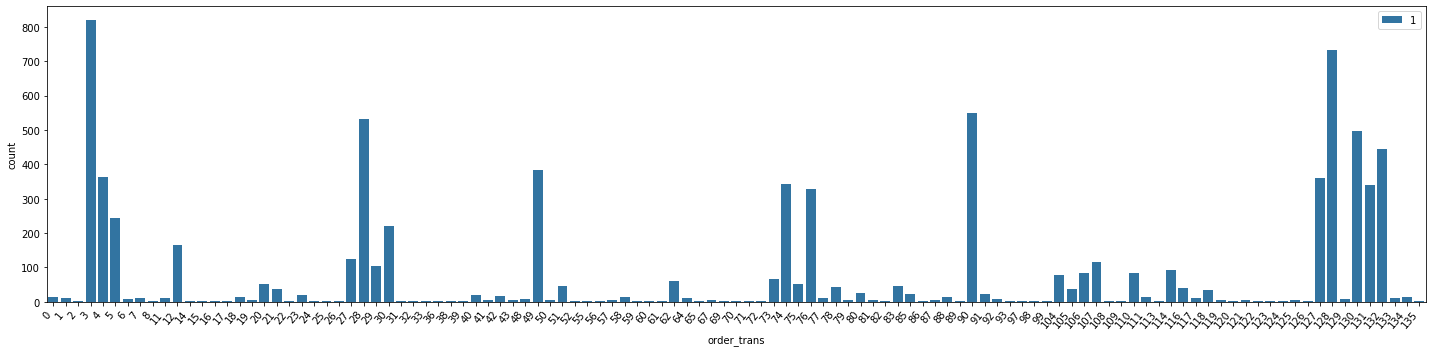

In [115]:
plt.figure(figsize=(20,5)) 
#sns.countplot(x='order', hue='payment_Status', data=df);
df1=df_order_pattern[(df_order_pattern['Payment Status'] == 1)]
ax = sns.countplot(x="order_trans", hue='Payment Status', data=df1)
plt.legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

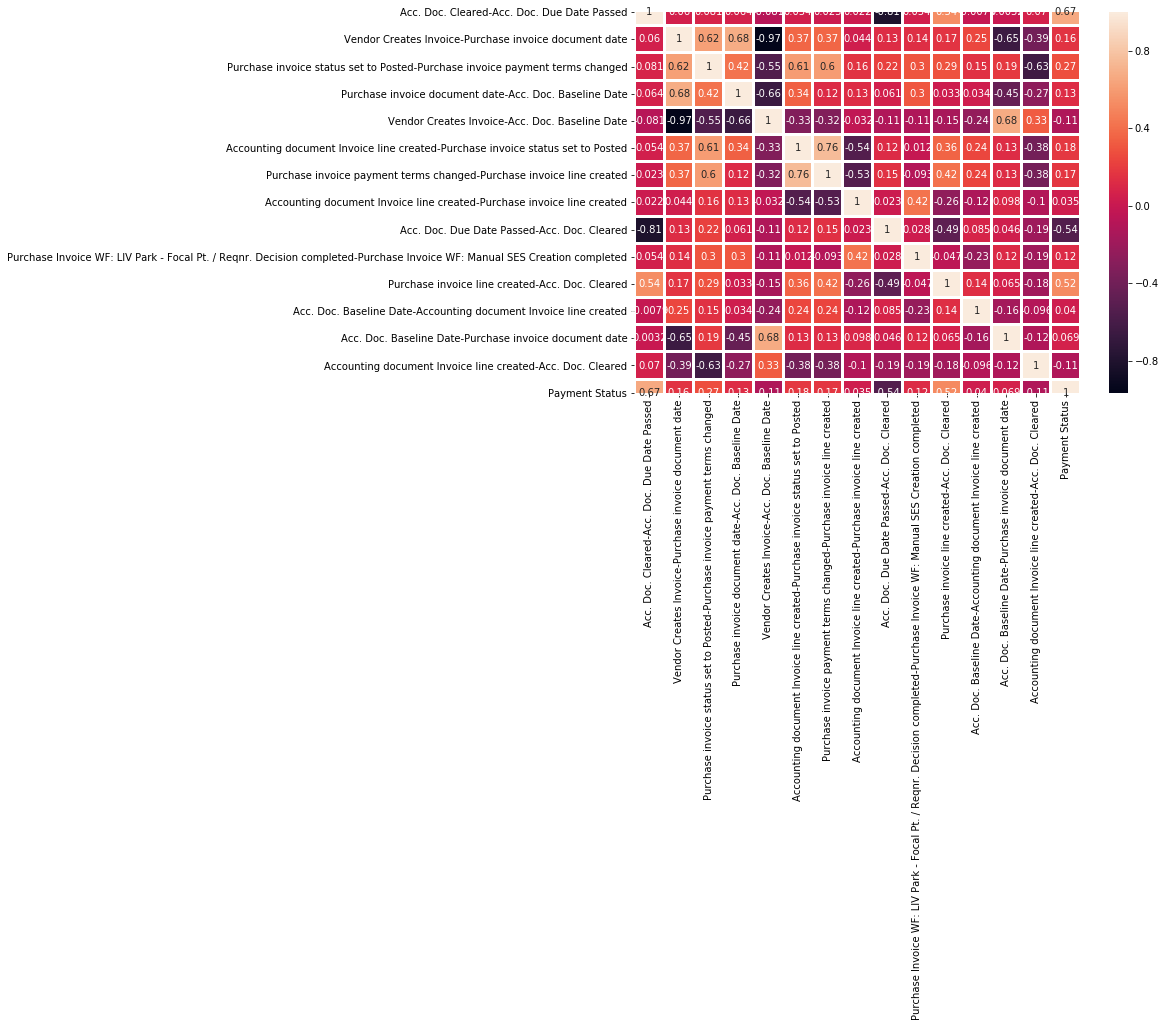

In [89]:
df_other_Features=df_final.iloc[:,1:15]
df_other_Features=pd.concat([df_other_Features,df_final.loc[:,'Payment Status']],axis=1)
#df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,13:]],axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(df_other_Features.corr(),annot=True,linewidths=2)

In [8]:
sum_column=df_one_hot.sum(axis=0)
print(sum_column)

Acc. Doc. Baseline Date Changed-Acc. Doc. Baseline Date Changed                               3
Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed                          4
Acc. Doc. Baseline Date Changed-Acc. Doc. Cleared                                            61
Acc. Doc. Baseline Date Changed-Acc. Doc. Due Date Passed                                     8
Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed                              2
                                                                                          ...  
Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed       13
Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed              76
Vendor Creates Invoice-Accounting document Credit Memo Correction created                     2
Vendor Creates Invoice-Accounting document Invoice line created                            2722
Vendor Creates Invoice-Purchase invoice 

In [15]:
sum_column.sort_values(ascending=False, inplace=True)
sum_column

Acc. Doc. Cleared-Acc. Doc. Due Date Passed                                                                                                31755
Vendor Creates Invoice-Purchase invoice document date                                                                                      27778
Purchase invoice status set to Posted-Purchase invoice payment terms changed                                                               23759
Purchase invoice document date-Acc. Doc. Baseline Date                                                                                     20122
Vendor Creates Invoice-Acc. Doc. Baseline Date                                                                                             18341
                                                                                                                                           ...  
Purchase invoice line price changed-Purchase Invoice WF: LIV Park - Focal Pt. / Reqnr. Decision completed                         

In [24]:
sum_row.sort_values(ascending=False, inplace=True)
sum_row

CASE_KEY
110DE0154014935672019001    101
110DE0154014870282019001     65
110DE0154014930932019001     64
110DE0154014943722019001     59
110CA4854020330932019001     51
                           ... 
110CA3715000472032019002      4
110CA3715000472022019002      4
110CA3715000472012019002      4
110CA3715000472002019002      4
110CA4815001872452019003      4
Length: 50183, dtype: int64

In [7]:
sum_row=df_one_hot.sum(axis=1)
print(sum_row)

CASE_KEY
110AT0115000200222019001     7
110AT0115000200942019001    13
110AT0115000200952019001    10
110AT0115000200982019001    16
110AT0115000200992019001     9
                            ..
110DE0154015036142019001     6
110DE0154015036152019001     6
110DE0154015036162019001     6
110DE0154015036172019001     6
110DE0154015036182019001     6
Length: 50183, dtype: int64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os as os
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#path="C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema3"
#os.chdir(path)

df = pd.read_excel(r"C:\\Users\\Shalini.M\\OneDrive - Shell\\Shalini\\Work\\Celonis\\Late Payment Prediction\\Schema3\\Schema3_Input2.xlsx")
df

,CASE_KEY,ACTIVITY_EN,EVENTTIME,SORTING,Payment Status,Company Code,Document Type,Entry Date,Time of Entry,Transaction Code,...,One-time account,ZTERM,Cash Discount Days 1,Cash Discount Days 2,Cash Discount Percentage 1,Cash Discount Percentage 2,Activities count,# Workflow Activities,# Change Activities,# Block Activities
0,110AT0115000200222019001,Vendor Creates Invoice,2019-05-08 00:00:00,10.0,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,0,0,0
1,110AT0115000200222019001,Acc. Doc. Baseline Date,2019-05-13 00:00:00,50.0,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,0,0,0
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,2019-05-15 03:06:54,NaN,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,1,0,0
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,2019-05-23 11:09:07,NaN,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,1,0,0
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,2019-06-04 13:20:30,NaN,On-Time,AT01,KN,20190604,132039,FBVB,...,NaN,YC30,30,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,110CA4854020979122019001,Acc. Doc. Due Date Passed,2019-09-16 23:59:59,70.0,On-Time,CA48,RN,20190722,62930,MIRO,...,NaN,YC60,60,0,0,0,1,0,0,0
199996,110CA4854020979132019001,Vendor Creates Invoice,2019-07-01 00:00:01,10.0,On-Time,CA48,RN,20190722,70107,MIRO,...,NaN,YC30,60,0,0,0,1,0,0,0
199997,110CA4854020979132019001,Purchase invoice document date,2019-07-01 00:00:01,80.0,On-Time,CA48,RN,20190722,70107,MIRO,...,NaN,YC30,60,0,0,0,1,0,0,0
199998,110CA4854020979132019001,Acc. Doc. Baseline Date,2019-07-19 00:00:00,50.0,On-Time,CA48,RN,20190722,70107,MIRO,...,NaN,YC30,60,0,0,0,1,0,0,0


In [59]:
df_other=df.iloc[:,:2].copy()
df_other['Link'] = df_other['ACTIVITY_EN'].shift(-1)


In [60]:
df_other["dummy_count"]=1
df_other['cumsum'] = df_other.groupby(['CASE_KEY'])['dummy_count'].transform(lambda x: x.cumsum())

In [61]:
df_other['summation'] = df_other.groupby(['CASE_KEY'])['dummy_count'].transform(sum)

In [62]:
df_other["new_counter"]=df_other['summation']-df_other['cumsum'] 

In [63]:
df_other['new_column_connect']=df_other['ACTIVITY_EN']+"-"+df_other['Link']

In [64]:
df_other['new_column_connect']=np.where(df_other['new_counter']==0,df_other['ACTIVITY_EN'],df_other['new_column_connect'])

In [65]:
df_other

,CASE_KEY,ACTIVITY_EN,Link,dummy_count,cumsum,summation,new_counter,new_column_connect
0,110AT0115000200222019001,Vendor Creates Invoice,Acc. Doc. Baseline Date,1,1,8,7,Vendor Creates Invoice-Acc. Doc. Baseline Date
1,110AT0115000200222019001,Acc. Doc. Baseline Date,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,1,2,8,6,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,Acc. Doc. WF: FI Only Non PO Coder decision ta...,1,3,8,5,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,Acc. Doc. WF: FI Only Non PO Select Appr from ...,1,4,8,4,Acc. Doc. WF: FI Only Non PO Coder decision ta...
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,Accounting document Invoice line created,1,5,8,3,Acc. Doc. WF: FI Only Non PO Select Appr from ...
...,...,...,...,...,...,...,...,...
199995,110CA4854020979122019001,Acc. Doc. Due Date Passed,Vendor Creates Invoice,1,9,9,0,Acc. Doc. Due Date Passed
199996,110CA4854020979132019001,Vendor Creates Invoice,Purchase invoice document date,1,1,4,3,Vendor Creates Invoice-Purchase invoice docume...
199997,110CA4854020979132019001,Purchase invoice document date,Acc. Doc. Baseline Date,1,2,4,2,Purchase invoice document date-Acc. Doc. Basel...
199998,110CA4854020979132019001,Acc. Doc. Baseline Date,Accounting document Invoice line created,1,3,4,1,Acc. Doc. Baseline Date-Accounting document In...


In [36]:
df_other.drop(['ACTIVITY_EN','Link','dummy_count','cumsum','summation','new_counter'],axis=1,inplace=True)
df_other

,CASE_KEY,new_counter,new_column_connect
0,110AT0115000200222019001,7,Vendor Creates Invoice-Acc. Doc. Baseline Date
1,110AT0115000200222019001,6,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...
2,110AT0115000200222019001,5,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
3,110AT0115000200222019001,4,Acc. Doc. WF: FI Only Non PO Coder decision ta...
4,110AT0115000200222019001,3,Acc. Doc. WF: FI Only Non PO Select Appr from ...
...,...,...,...
199995,110CA4854020979122019001,0,Acc. Doc. Due Date Passed
199996,110CA4854020979132019001,3,Vendor Creates Invoice-Purchase invoice docume...
199997,110CA4854020979132019001,2,Purchase invoice document date-Acc. Doc. Basel...
199998,110CA4854020979132019001,1,Acc. Doc. Baseline Date-Accounting document In...


In [37]:
df_other.drop(df_other[df_other.new_counter==0].index, inplace=True)
df_other

,CASE_KEY,new_counter,new_column_connect
0,110AT0115000200222019001,7,Vendor Creates Invoice-Acc. Doc. Baseline Date
1,110AT0115000200222019001,6,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...
2,110AT0115000200222019001,5,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
3,110AT0115000200222019001,4,Acc. Doc. WF: FI Only Non PO Coder decision ta...
4,110AT0115000200222019001,3,Acc. Doc. WF: FI Only Non PO Select Appr from ...
...,...,...,...
199993,110CA4854020979122019001,2,Purchase invoice line created-Acc. Doc. Cleared
199994,110CA4854020979122019001,1,Acc. Doc. Cleared-Acc. Doc. Due Date Passed
199996,110CA4854020979132019001,3,Vendor Creates Invoice-Purchase invoice docume...
199997,110CA4854020979132019001,2,Purchase invoice document date-Acc. Doc. Basel...


In [44]:
df_one_hot=df_other.drop('new_column_connect', 1).join(df_other.new_column_connect.str.get_dummies())
df_one_hot

,CASE_KEY,Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cleared,Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV Qty Block GR / Cr Note - A13 completed,Acc. Doc. Baseline Date-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date-Acc. Doc. Cleared,...,Purchase subsequent debit payment terms changed-Purchase Subsequent Debit line created,Vendor Creates Invoice-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Cleared,Vendor Creates Invoice-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Acc. Doc. For Payment Block Removed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Coder decision task completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,Vendor Creates Invoice-Accounting document Invoice line created,Vendor Creates Invoice-Purchase invoice document date
0,110AT0115000200222019001,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,110AT0115000200222019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110AT0115000200222019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110AT0115000200222019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,110AT0115000200222019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,110CA4854020979122019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199994,110CA4854020979122019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199996,110CA4854020979132019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199997,110CA4854020979132019001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
values=df_act['CASE_KEY']
label_encoder=LabelEncoder()
df_act['CASE_KEY_label']=label_encoder.fit_transform(values)
df_act

,CASE_KEY,new_column_connect,CASE_KEY_label
0,110AT0115000200222019001,Vendor Creates Invoice-Acc. Doc. Baseline Date,0
1,110AT0115000200222019001,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...,0
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,0
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...,0
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...,0
...,...,...,...
199993,110CA4854020979122019001,Purchase invoice line created-Acc. Doc. Cleared,22728
199994,110CA4854020979122019001,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,22728
199996,110CA4854020979132019001,Vendor Creates Invoice-Purchase invoice docume...,22729
199997,110CA4854020979132019001,Purchase invoice document date-Acc. Doc. Basel...,22729


In [68]:
df_Pivot = df_act.pivot_table('CASE_KEY','new_column_connect')
df_Pivot

,CASE_KEY_label
new_column_connect,
Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,7354.500000
Acc. Doc. Baseline Date Changed-Acc. Doc. Cleared,12413.444444
Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,2496.000000
Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,9932.000000
Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,19952.000000
...,...
Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Coder decision task completed,5666.772575
Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,6513.500000
Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,7368.687500


In [45]:
df_other.to_excel('one_hot.xlsx')

KeyboardInterrupt: 

In [50]:
#df_one_hot=pd.concat([pd.get_dummies(df_act[['new_column_connect']]), df_act[['CASE_KEY']]], axis=1)
df_one_hot=pd.concat([pd.get_dummies(df_act['new_column_connect']), df_act['CASE_KEY']], axis=1)
df_one_hot

,Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cleared,Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV Qty Block GR / Cr Note - A13 completed,Acc. Doc. Baseline Date-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date-Acc. Doc. Cleared,Acc. Doc. Baseline Date-Acc. Doc. Due Date Passed,...,Vendor Creates Invoice-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Cleared,Vendor Creates Invoice-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Acc. Doc. For Payment Block Removed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Coder decision task completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,Vendor Creates Invoice-Accounting document Invoice line created,Vendor Creates Invoice-Purchase invoice document date,CASE_KEY
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,110AT0115000200222019001
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110AT0115000200222019001
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110AT0115000200222019001
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110AT0115000200222019001
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110AT0115000200222019001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110CA4854020979122019001
199994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110CA4854020979122019001
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,110CA4854020979132019001
199997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110CA4854020979132019001


In [1]:
df_imp['Total'] = df_one_hot.sum(axis=1)
df_imp

NameError: name 'df_one_hot' is not defined

In [ ]:
df_one_hot.groupby(['CASE_KEY'], as_index=False)['PR Rate'].sum()

In [49]:
df_ln_one_hot = pd.get_dummies(df_act['new_column_connect'])
df_ln_one_hot

,Acc. Doc. Baseline Date Changed-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. Cleared,Acc. Doc. Baseline Date Changed-Acc. Doc. Payment Method Changed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: FI Only Non PO DA - Approve / Reject_R22 completed,Acc. Doc. Baseline Date Changed-Acc. Doc. WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV DA - Approve / Reject R2.2 completed,Acc. Doc. Baseline Date Changed-Purchase Invoice WF: LIV Qty Block GR / Cr Note - A13 completed,Acc. Doc. Baseline Date-Acc. Doc. Cash Discount Days Changed,Acc. Doc. Baseline Date-Acc. Doc. Cleared,Acc. Doc. Baseline Date-Acc. Doc. Due Date Passed,...,Purchase subsequent debit payment terms changed-Purchase Subsequent Debit line created,Vendor Creates Invoice-Acc. Doc. Baseline Date,Vendor Creates Invoice-Acc. Doc. Cleared,Vendor Creates Invoice-Acc. Doc. Due Date Passed,Vendor Creates Invoice-Acc. Doc. For Payment Block Removed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Coder decision task completed,Vendor Creates Invoice-Acc. Doc. WF: FI Only Non PO Select Appr from pop A13 completed,Vendor Creates Invoice-Acc. Doc. WF: SER FI Confirmation Screen-IRN14 completed,Vendor Creates Invoice-Accounting document Invoice line created,Vendor Creates Invoice-Purchase invoice document date
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.merge(df_one_hot,Actuals_CC,how='outer',on=['Country','cost_Center'])

In [42]:
#df_other.to_excel('output.xlsx')
df_other.head(20)

,CASE_KEY,new_column_connect
0,110AT0115000200222019001,Vendor Creates Invoice-Acc. Doc. Baseline Date
1,110AT0115000200222019001,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...
2,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
3,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Select Appr from ...
5,110AT0115000200222019001,Accounting document Invoice line created-Acc. ...
6,110AT0115000200222019001,Acc. Doc. Cleared-Acc. Doc. Due Date Passed
8,110AT0115000200942019001,Vendor Creates Invoice-Acc. Doc. Baseline Date
9,110AT0115000200942019001,Acc. Doc. Baseline Date-Acc. Doc. WF: FI Only ...
10,110AT0115000200942019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...


In [10]:
df_act=df.iloc[:50000,:2].copy()
gp=df_act.groupby('CASE_KEY')
df_link = pd.DataFrame(columns=['CASE_KEY','Link'])
for name,tab in gp:
    tab['Link']=''
    for i in range(len(tab)-1):
        tab.iloc[i,2]=tab.iloc[i,1]+'-'+tab.iloc[i+1,1]
        df_link=df_link.append({'CASE_KEY':tab.iloc[i,0],'Link':tab.iloc[i,2]}, ignore_index=True)
df_link

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pan

,CASE_KEY,Link,Budget Item,JV Name
0,NaN,NaN,Vendor Creates Invoice-Acc. Doc. Baseline Date,110AT0115000200222019001
1,NaN,NaN,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...,110AT0115000200222019001
2,NaN,NaN,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,110AT0115000200222019001
3,NaN,NaN,Acc. Doc. WF: FI Only Non PO Coder decision ta...,110AT0115000200222019001
4,NaN,NaN,Acc. Doc. WF: FI Only Non PO Select Appr from ...,110AT0115000200222019001
...,...,...,...,...
45044,NaN,NaN,Acc. Doc. WF: LIV DA - Approve / Reject R2.2 c...,110BM2354000320342019001
45045,NaN,NaN,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,110BM2354000320342019001
45046,NaN,NaN,Vendor Creates Invoice-Acc. Doc. Baseline Date,110BM2354000320372019001
45047,NaN,NaN,Acc. Doc. Baseline Date-Purchase invoice docum...,110BM2354000320372019001


In [14]:
df_act=df.iloc[:10000,:2].copy()
gp=df_act.groupby('CASE_KEY')
df_link = pd.DataFrame(columns=['CASE_KEY','Link'])
for name,tab in gp:
    tab['Link']=''
    for i in range(len(tab)):
        tab['shift'] = tab['ACTIVITY_EN'].shift(1)
        tab['Link']=tab['ACTIVITY_EN']+'-'+tab['shift']
#        tab.iloc[i,2]=tab.iloc[i,1]+'-'+tab.iloc[i+1,1]
        df_link=df_link.append({'CASE_KEY':tab.iloc[i,0],'Link':tab.iloc[i,3]}, ignore_index=True)
df_link

C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Shalini.M\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,CASE_KEY,Link
0,110AT0115000200222019001,NaN
1,110AT0115000200222019001,Vendor Creates Invoice
2,110AT0115000200222019001,Acc. Doc. Baseline Date
3,110AT0115000200222019001,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...
4,110AT0115000200222019001,Acc. Doc. WF: FI Only Non PO Coder decision ta...
...,...,...
18038,110BE0154001488712019001,Vendor Creates Invoice
18039,110BE0154001488712019001,Acc. Doc. Baseline Date
18040,110BE0154001488712019001,Purchase invoice document date
18041,110BE0154001488712019001,Purchase Invoice WF: SER LIV Inv - Exception S...


In [ ]:
df_link.to_excel('Activity_concat1.xlsx')

In [11]:
df_link.drop(['CASE_KEY','Link'],axis=1,inplace=True)
df_link.rename(columns = {'Budget Item':'Link','JV Name':'CASE_KEY'}, inplace = True)
df_link

,Link,CASE_KEY
0,Vendor Creates Invoice-Acc. Doc. Baseline Date,110AT0115000200222019001
1,Acc. Doc. Baseline Date-Acc. Doc. WF: SER FI C...,110AT0115000200222019001
2,Acc. Doc. WF: SER FI Confirmation Screen-IRN14...,110AT0115000200222019001
3,Acc. Doc. WF: FI Only Non PO Coder decision ta...,110AT0115000200222019001
4,Acc. Doc. WF: FI Only Non PO Select Appr from ...,110AT0115000200222019001
...,...,...
45044,Acc. Doc. WF: LIV DA - Approve / Reject R2.2 c...,110BM2354000320342019001
45045,Acc. Doc. Cleared-Acc. Doc. Due Date Passed,110BM2354000320342019001
45046,Vendor Creates Invoice-Acc. Doc. Baseline Date,110BM2354000320372019001
45047,Acc. Doc. Baseline Date-Purchase invoice docum...,110BM2354000320372019001


In [3]:
df_other=df.copy()
df_other.loc[df_other['Parked by'].str.len() == 6, 'Parked by'] = 'User'
df_other.loc[df_other['Parked by'].str.len() > 6, 'Parked by'] = 'Batch'
df_other=df_other.groupby(['Payment Status','CASE_KEY','Company Code', 'Document Type','Transaction Code', 'Local Currency','Parked by',
                 'Region','ZTERM','Cash Discount Days 1','Cash Discount Days 2', 'Cash Discount Percentage 1',
                 'Cash Discount Percentage 2'], as_index=False)['Activities count','# Workflow Activities',
                 '# Change Activities','# Block Activities'].sum()
values=df_other['Payment Status']
label_encoder=LabelEncoder()
df_other['Payment Status']=label_encoder.fit_transform(values)
values=df_other['Parked by']
label_encoder=LabelEncoder()
df_other['Parked by']=label_encoder.fit_transform(values)
values=df_other['Company Code']
label_encoder=LabelEncoder()
df_other['Company Code']=label_encoder.fit_transform(values)
values=df_other['Document Type']
label_encoder=LabelEncoder()
df_other['Document Type']=label_encoder.fit_transform(values)
values=df_other['Transaction Code']
label_encoder=LabelEncoder()
df_other['Transaction Code']=label_encoder.fit_transform(values)
values=df_other['Local Currency']
label_encoder=LabelEncoder()
df_other['Local Currency']=label_encoder.fit_transform(values)
values=df_other['Region']
label_encoder=LabelEncoder()
df_other['Region']=label_encoder.fit_transform(values)
values=df_other['ZTERM']
label_encoder=LabelEncoder()
df_other['ZTERM']=label_encoder.fit_transform(values)
df_other

,Payment Status,CASE_KEY,Company Code,Document Type,Transaction Code,Local Currency,Parked by,Region,ZTERM,Cash Discount Days 1,Cash Discount Days 2,Cash Discount Percentage 1,Cash Discount Percentage 2,Activities count,# Workflow Activities,# Change Activities,# Block Activities
0,0,110BM2315000080402019001,3,0,0,0,0,9,10,30,0,0,0,9,4,0,0
1,0,110BM2315000081142019001,3,0,0,0,1,44,10,30,0,0,0,13,8,0,0
2,0,110BM2315000081152019001,3,0,0,0,1,9,10,30,0,0,0,9,4,0,0
3,0,110BM2315000081162019001,3,0,0,0,1,9,10,30,0,0,0,9,4,0,0
4,0,110BM2315000081232019001,3,0,0,0,1,9,6,3,0,0,0,10,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,2,110CA4854020979062019001,6,2,1,2,0,38,13,60,0,0,0,10,1,1,0
7939,2,110CA4854020979072019001,6,2,1,2,0,38,13,60,0,0,0,11,1,1,1
7940,2,110CA4854020979082019001,6,2,1,2,1,38,13,60,0,0,0,20,11,1,0
7941,2,110CA4854020979092019001,6,2,1,2,0,38,13,60,0,0,0,12,3,1,0


In [9]:
df_other['Parked by'].value_counts()

0    6092
1    1851
Name: Parked by, dtype: int64

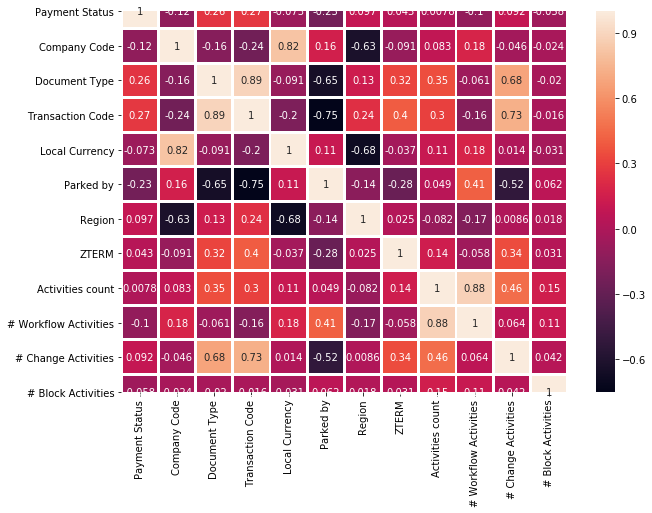

In [52]:
#df_activity_Features=df_other.iloc[:,0]
#df_activity_Features=pd.concat([df_activity_Features,df_other.iloc[:,2:]],axis=1)
df_other_Features=df_other.iloc[:,0]
df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,2:9]],axis=1)
df_other_Features=pd.concat([df_other_Features,df_other.iloc[:,13:]],axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(df_other_Features.corr(),annot=True,linewidths=2)

In [15]:
df_other_Features

,Payment Status,Company Code,Document Type,Transaction Code,Local Currency,Parked by,Region,ZTERM,Activities count,# Workflow Activities,# Change Activities,# Block Activities
0,0,3,0,0,0,0,9,10,9,4,0,0
1,0,3,0,0,0,1,44,10,13,8,0,0
2,0,3,0,0,0,1,9,10,9,4,0,0
3,0,3,0,0,0,1,9,10,9,4,0,0
4,0,3,0,0,0,1,9,6,10,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7938,2,6,2,1,2,0,38,13,10,1,1,0
7939,2,6,2,1,2,0,38,13,11,1,1,1
7940,2,6,2,1,2,1,38,13,20,11,1,0
7941,2,6,2,1,2,0,38,13,12,3,1,0


In [ ]:
df_Pivot.drop(['WRBTR_CONVERTED','order','order_trans'],axis=1,inplace=True)
y=['Payment Status']
x=[i for i in df_Pivot if i not in y]
x